In [ ]:
import xarray

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# checl the data from 2020 to 2023

data_tp_20_to_23 = xarray.open_dataset('/Users/jules/Documents/data/era5_total_percipitation_2020-2023/era5_total_percipitation_2020-2023.nc')

In [39]:
data_tp_20_to_23.time

<xarray.DataArray 'time' (time: 35064)>
array(['2020-01-01T00:00:00.000000000', '2020-01-01T01:00:00.000000000',
       '2020-01-01T02:00:00.000000000', ..., '2023-12-31T21:00:00.000000000',
       '2023-12-31T22:00:00.000000000', '2023-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2023-12-31T23:00:00
Attributes:
    long_name:  time

In [ ]:
# get data from 2020 only
data_tp_2020 = data_tp_20_to_23.sel(time=slice('2020-01-01', '2020-12-31'))

In [10]:
data_tp_2020.latitude

<xarray.DataArray 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [36]:
# filter to only halle an der saale lats and lons
data_tp_2020_halle = data_tp_2020.sel(latitude=51.48, longitude=12.0, method='nearest')
data_tp_20_to_23_halle = data_tp_20_to_23.sel(latitude=51.48, longitude=12.0, method='nearest')

In [37]:
# pick expver=1
data_tp_2020_halle = data_tp_2020_halle.sel(expver=1)
data_tp_20_to_23_halle = data_tp_20_to_23_halle.sel(expver=1)

In [41]:
# get the max value and corresponding time
max_value = data_tp_20_to_23_halle.tp.max()
print(max_value.values)
print(data_tp_20_to_23_halle.time[data_tp_20_to_23_halle.tp.argmax()].values)

0.0428507924079895
2023-12-01T07:00:00.000000000


# 2020-23

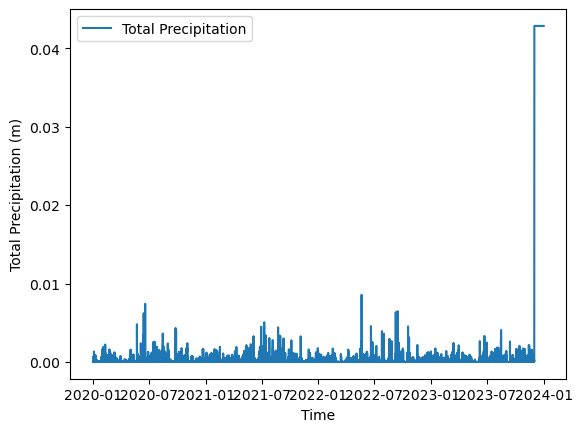

In [38]:
plt.plot(data_tp_20_to_23_halle.time, data_tp_20_to_23_halle.tp)
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')
# legend
plt.legend(['Total Precipitation'])

# 2020

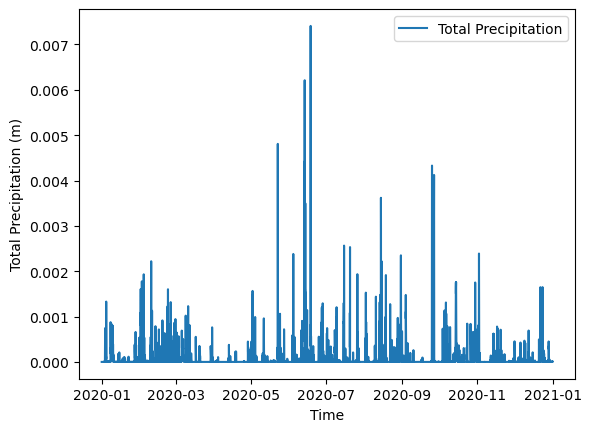

In [29]:
# plot total precipitation vs time

plt.plot(data_tp_2020_halle.time, data_tp_2020_halle.tp)
plt.xlabel('Time')
plt.ylabel('Total Precipitation (m)')
# legend
plt.legend(['Total Precipitation'])

(array([18423., 18424., 18425., 18426., 18427., 18428., 18429., 18430.]),
 [Text(18423.0, 0, '2020-06-10'),
  Text(18424.0, 0, '2020-06-11'),
  Text(18425.0, 0, '2020-06-12'),
  Text(18426.0, 0, '2020-06-13'),
  Text(18427.0, 0, '2020-06-14'),
  Text(18428.0, 0, '2020-06-15'),
  Text(18429.0, 0, '2020-06-16'),
  Text(18430.0, 0, '2020-06-17')])

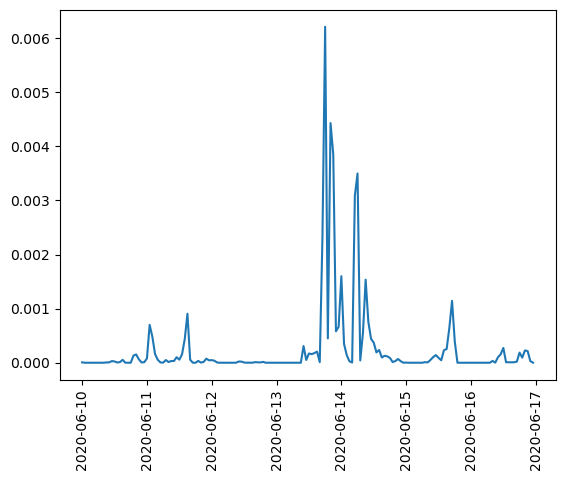

In [35]:
# get only may to july
data_tp_2020_halle_july = data_tp_2020_halle.sel(time=slice('2020-06-10', '2020-06-16'))
plt.plot(data_tp_2020_halle_july.time, data_tp_2020_halle_july.tp)
# x axis tick vertical
plt.xticks(rotation=90)

In [42]:
# 14.6.2020 it is
# hoher niederschlag in esri daten und online
# https://www.wetterkontor.de/de/wetter/deutschland/rueckblick.asp?id=S713&datum0=18.05.2020&datum1=14.06.2020&jr=2024&mo=2&datum=20.06.2020&t=4&part=2